# 2層ニューラルネットワークで単純な回帰問題を解く

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from common.activations import softmax, sigmoid, linear
from common.grad import numerical_gradient
from common.loss import mean_squared_error

## 2層ニューラルネットワーククラスの改良

### [演習]
* 2層ニューラルネットワーククラスを回帰問題用に改良しましょう。
* 以下のクラスを完成させましょう。

In [2]:
class TwoLayerNet():
    def __init__(self, input_size, hidden_size, output_size):
        
        # 重みの初期化
        self.params = {}
        init_std=0.01
        np.random.seed(1234)
        self.params["W1"] = init_std * np.random.randn(input_size, hidden_size)
        self.params["b1"] = np.zeros(hidden_size)
        self.params["W2"] = init_std * np.random.randn(hidden_size, output_size)
        self.params["b2"] = np.zeros(output_size)
                
    def predict(self, x):
        """
        予測関数
        x : 入力データ
        """
        W1, W2 = self.params["W1"], self.params["W2"]
        b1, b2 = self.params["b1"], self.params["b2"]
        
        h1 = np.dot(x, W1) + b1
        z1 = sigmoid(h1)
        h2 = np.dot(z1, W2) + b2
        y = linear(h2)
        return y
    
    def loss(self, x, t):
        """
        損失関数
        x : 入力データ
        t : 正解データ
        """
        y = self.predict(x)
        loss = mean_squared_error(y, t)
        return loss
    
    def gradient(self, x, t):
        """
        勾配計算関数
        """
        grads={}
        f = self.loss
        grads["W1"] = numerical_gradient(f, x, self.params["W1"], t)
        grads["b1"] = numerical_gradient(f, x, self.params["b1"], t)
        grads["W2"] = numerical_gradient(f, x, self.params["W2"], t)
        grads["b2"] = numerical_gradient(f, x, self.params["b2"], t)
        return grads

## データの生成

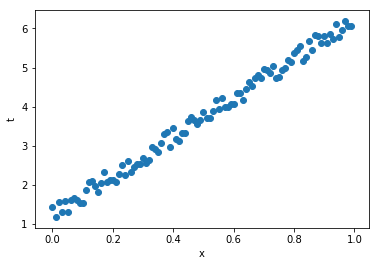

In [3]:
a = 5
b = 1
x = np.arange(0, 1, 0.01).reshape(1,-1)
error = np.random.rand(x.size) * 0.5
t = a * x + b + error
plt.scatter(x, t)
plt.xlabel("x")
plt.ylabel("t")
plt.show()

## バッチ学習

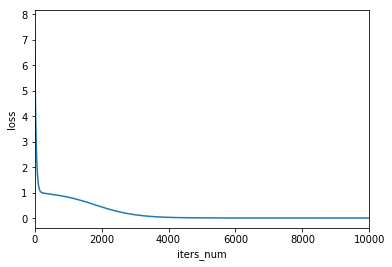

W1= [[4.39]]
b1= [-2.21]
W2= [[5.52]]
b2= [0.99]
mse= 0.014170900273862252


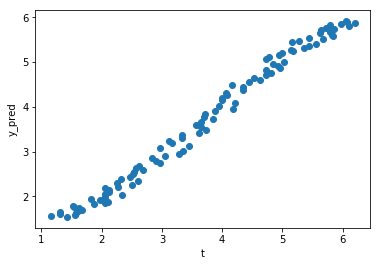

In [4]:
x = x.reshape(-1, 1) # ベクトルを行列に変換
t = t.reshape(-1, 1) # ベクトルを行列に変換

iters_num = 10000
lr = 0.01

tnet = TwoLayerNet(input_size=1, hidden_size=1, output_size=1)

li_loss = []
for i in range(iters_num):
    
    # 勾配の計算
    grads = tnet.gradient(x, t)

    # パラメータの更新
    for key in tnet.params.keys():
#         print(key)
        tnet.params[key] -= lr * grads[key]
        
    # 学習経過の記録
    loss = tnet.loss(x, t)
    li_loss.append(loss)

# lossのグラフ化
pd.DataFrame(li_loss).plot(legend=None)
plt.ylabel("loss")
plt.xlabel("iters_num")
plt.show()

# 最終重みの確認
print("W1=", tnet.params["W1"].round(2))
print("b1=", tnet.params["b1"].round(2))
print("W2=", tnet.params["W2"].round(2))
print("b2=", tnet.params["b2"].round(2))

# 訓練誤差の確認
y_pred = tnet.predict(x)
print("mse=",mean_squared_error(y_pred, t))

# 学習データと予測データの比較
plt.scatter(t, y_pred)
plt.xlabel("t") # 正解データ
plt.ylabel("y_pred") # 予測データ
plt.show()

## ミニバッチ学習

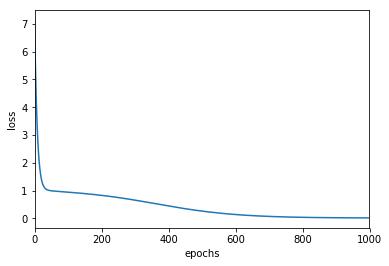

[[4.31]]
[-2.15]
[[5.23]]
[1.12]
mse= 0.018883758274371772


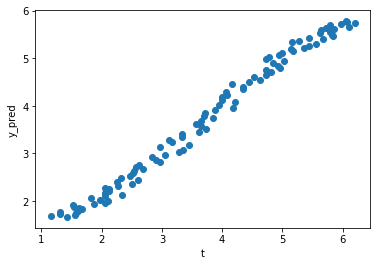

In [5]:
x = x.reshape(-1, 1) # ベクトルを行列に変換
t = t.reshape(-1, 1) # ベクトルを行列に変換

epochs = 1000
batch_size = 20
lr = 0.01

# 繰り返し回数
xsize = x.shape[0]
iter_num = np.ceil(xsize / batch_size).astype(np.int) # ceilは切り上げ関数

# 2層NNのオブジェクト生成
tnet = TwoLayerNet(input_size=1, hidden_size=1, output_size=1)

li_loss = []
for epoch in range(epochs):
    
    # シャッフル
    idx = np.arange(xsize)
    np.random.shuffle(idx)

    for it in range(iter_num):
        """
        ランダムなミニバッチを順番に取り出す
        """
        mask = idx[batch_size*it : batch_size*(it+1)]
    
        # ミニバッチの生成
        x_train = x[mask]
        t_train = t[mask]
        
        # 勾配の計算
        grads = tnet.gradient(x_train, t_train)

        # パラメータの更新
        for key in tnet.params.keys():
    #         print(key)
            tnet.params[key] -= lr * grads[key]

    # 学習経過の記録
    loss = tnet.loss(x, t)
    li_loss.append(loss)

# lossのグラフ化
pd.DataFrame(li_loss).plot(legend=None)
plt.ylabel("loss")
plt.xlabel("epochs")
plt.show()

# 最終重みの確認
print(tnet.params["W1"].round(2))
print(tnet.params["b1"].round(2))
print(tnet.params["W2"].round(2))
print(tnet.params["b2"].round(2))

# 訓練誤差の確認
y_pred = tnet.predict(x)
print("mse=",mean_squared_error(y_pred, t))

# 学習データと予測データの比較
plt.scatter(t, y_pred)
plt.xlabel("t")
plt.ylabel("y_pred")
plt.show()